<div style="border:solid Blue 2px; padding: 40px">
<h1>  Рекомендация тарифов</h1>
    
    
    Имеются данные о поведении клиентов, которые еще не перешли на тарифы "Смарт" и "Ультра" - клиенты пользуются архивными тарифами. Необходимо построить модель  которая проанализирует поведение клиента и предложит ему один из новых тарифов.
    Предобработка данных не понадобится.

    Задача: построить модель с максимально большим значением accuracy. 
    Нужно довести долю правильных ответов по крайней мере до 0.75. 
    Проверяем accuracy на тестовой выборке а также проверяем модель на адекватность.

### Открываем и изучаем файл

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<div style="border:solid Blue 2px; padding: 40px">
    
    Ревью: 
   - Пропусков в данных нет. 
   - Типы данных также корректные.
   - Смотрим на данные целиком с помощью графика

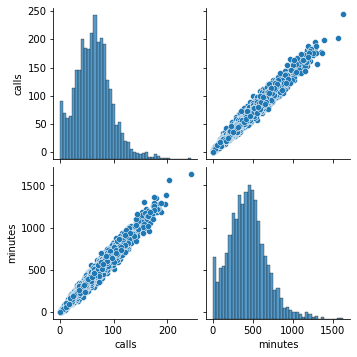

In [7]:
sns.pairplot(df[['calls', 'minutes']]);

    Обнаружили мультиколлинеарность - что может осложнить обучение. 
    Решить проблему поможет удаление одного из признаков

## Деление на выборки

<div style="border:solid Blue 2px; padding: 40px">
    
 - Разбиваем данные на три выборки и проверяем их конечные размеры

In [8]:
df_2 = df.copy()
df_2 = df_2.drop('calls', axis=1)
features = df_2.drop('is_ultra', axis=1)
target = df_2['is_ultra']

In [9]:
features_train, features_tmp, target_train, target_tmp = \
    train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = \
    train_test_split(features_tmp, target_tmp, test_size=0.5, random_state=12345, stratify=target_tmp)

In [10]:
#print(target_valid.shape)
#print(features_valid.shape)
#print(features_test.shape)

- ***features_valid*** - валидационная выборка 
- ***features_train*** - тренировочная выборка
- ***features_test*** - тестовая выборка

## Исследуем модели

<div style="border:solid Blue 2px; padding: 40px">
    
    Целевой признак: 
  - Hаличие у абонента тарифа "Ультра" (1- есть, 0- нет). 
  - Целевой признак категориальный, значит решаем задачу ***классификации*** и рассмотрим для решения этой задачи  несколько моделей машинного обучения.

### Модель 1: **RandomForestClassifier**

In [11]:
n_estimators_count = 0
#кол-во деревьев
max_depth_count = 0
#глубина дерева
accuracy_count = 0
#качество модели

for n_es in range(10, 101, 10):
    for max_d in range(2, 16):
        model_random_forest = RandomForestClassifier(random_state=12345, max_depth=max_d, n_estimators=n_es)
        model_random_forest.fit(features_train, target_train)
        pred_random_forest = model_random_forest.predict(features_valid)
        accuracy_random_forest = accuracy_score(pred_random_forest, target_valid)
        if accuracy_random_forest > accuracy_count:
            n_estimators_count = n_es
            max_depth_count = max_d
            accuracy_count = accuracy_random_forest
       

In [12]:
print('Качество модели Случайный лес:', accuracy_count.round(3))
print('Максимальная глубина:', max_depth_count)
print('Кол-во деревьев:', n_estimators_count)

Качество модели Случайный лес: 0.816
Максимальная глубина: 12
Кол-во деревьев: 50


### Модель 2: **DecisionTreeClassifier**

In [13]:
#кол-во деревьев
dt_depth = 0
#качество модели
dt_result = 0

for depth in range(1, 21):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predict_train = model_dt.predict(features_train)
    predict_valid = model_dt.predict(features_valid)
    train_result = accuracy_score(target_train, predict_train)
    valid_result = accuracy_score(target_valid, predict_valid)
    if valid_result > dt_result:
        dt_depth = depth
        dt_result = valid_result

In [14]:
print('Качество модели Дерево решений:', dt_result.round(3))
print('Максимальная глубина:', dt_depth)

Качество модели Дерево решений: 0.792
Максимальная глубина: 8


### Модель 3: **LogisticRegression**

In [15]:
model_logistic_reg = LogisticRegression()
model_logistic_reg.fit(features_train, target_train)
pridict_lr = model_logistic_reg.predict(features_valid)
accuracy_lr = accuracy_score(pridict_lr, target_valid)

In [16]:
print('Качество модели Логистическая регрессия:', accuracy_lr.round(2))

Качество модели Логистическая регрессия: 0.72


### **Сравнение точности трех моделей и выявление лучшей**

In [17]:
print('Качество модели Случайный лес:', accuracy_count.round(3))
print('Качество модели Дерево решений:', dt_result.round(3))
print('Качество модели Логистическая регрессия:', accuracy_lr.round(2))

Качество модели Случайный лес: 0.816
Качество модели Дерево решений: 0.792
Качество модели Логистическая регрессия: 0.72


<div style="border:solid Blue 2px; padding: 40px">
    Вывод:
    
   - Разбили данные на выборки
   - Обучили модели LogisticRegression, DecisionThreeClassifier, RandomForestClassifier
   - Получила оценку качества моделей (accuracy)
   - Осуществила подбор гиперпараметров в цикле
    
    
    Исследовав три модели машинного обучения, выяснили что лучший результат принадлежит модели - Random forest.

## Проверяем модель на тестовой выборке

<div style="border:solid Blue 2px; padding: 40px">
    
    Проверка лучшей модели Random forest на тестовой (оценочной) выборке:

In [18]:
predict_test = model_random_forest.predict(features_test)
accuracy_test = accuracy_score(predict_test, target_test)

In [19]:
print('Результаты модели на тестовой выборке:', accuracy_test.round(4))
print('Результаты модели на обучающей выборке:', dt_result.round(4))

Результаты модели на тестовой выборке: 0.832
Результаты модели на обучающей выборке: 0.7916


<div style="border:solid Blue 2px; padding: 40px">
    
    Модель Random forest прошла проверку на тестовой выборке с результатом accuracy 0.83 - высокий показатель

## Проверяем модель на адекватность

In [23]:
model_bonus = DummyClassifier(strategy='most_frequent', random_state=1)
#константная модель, где по most_frequent будет предсказание
model_bonus.fit(features_train, target_train)
#обучение
model_bonus.predict(features_valid)
#предсказание
acc = model_bonus.score(features_test, target_test)
#считаем
print('Адекватность модели DummyClassifier:', acc.round(2))

Адекватность модели DummyClassifier: 0.69


## Вывод

<div style="border:solid Blue 2px; padding: 40px">
<h1>  Итоговый комментарий </h1>
    
    - Данные поделили на выборки - тренировочную, валидационную и тестовую. Предобработка не требовалась.
    - Построили нужную модель, подобрали гиперпараметры, добились на тренировочной выборке значение accuracy 0.79, а на тестовой 0.83 - что является хорошим показателем качества модели.
    - Модель машинного обучения RandomForestClassifier (с параметрами: max_depth_count = 12 и n_estimators_count = 50) можно рекоммендовать для бизнеса в качестве дополнительного инструмента подбора тарифа.